In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score

df =pd.read_csv("yes_bank_stock_prices.csv")
print("rows, cols:" , df.shape)

Defaulting to user installation because normal site-packages is not writeable
rows, cols: (185, 5)


In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'yes_bank_stock_prediction.ipynb',
 'yes_bank_stock_prices.csv.csv']

In [2]:
display(df.head())

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
df['Date'].value_counts()

Date
Jul-05    1
Aug-05    1
Sep-05    1
Oct-05    1
Nov-05    1
         ..
Jul-20    1
Aug-20    1
Sep-20    1
Oct-20    1
Nov-20    1
Name: count, Length: 185, dtype: int64

In [4]:
df['Date'].dtype


dtype('O')

In [14]:
df = df.sort_values('Date').reset_index(drop=True)

In [15]:
df["Date"] = pd.to_datetime(df["Date"], format='%b-%y', errors='coerce')

In [16]:
df = df.dropna(subset=["Date"])

In [17]:
df["Date"].head()

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]

In [18]:
df["Date"].min()

Timestamp('2005-07-01 00:00:00')

In [19]:
df["Date"].max()

Timestamp('2020-11-01 00:00:00')

In [94]:
close_prices = df["Close"]
df['Prev_Close'] = df['Close'].shift(1)
df['HL_Range'] = df['High'] - df['Low']
df['OC_difference'] = df['Close'] - df['Open']
df['Return'] = df['Close'].pct_change()
df['MA_7'] = df['Close'].shift(1).rolling(7).mean()
df['MA_14'] = df['Close'].shift(1).rolling(14).mean()
df.dropna()

,Date,Open,High,Low,Close,HL_Range,OC_difference,Return,MA_7,MA_14,Prev_Close
14,Sep-06,18.00,18.88,16.80,18.46,2.08,0.46,0.034753,17.620000,15.568571,17.84
15,Oct-06,18.78,24.20,18.50,22.78,5.70,4.00,0.234020,17.954286,15.997143,18.46
16,Nov-06,22.80,28.47,21.40,25.32,7.07,2.52,0.111501,18.340000,16.665714,22.78
17,Dec-06,25.40,29.66,24.40,26.97,5.26,1.57,0.065166,19.172857,17.524286,25.32
18,Jan-07,27.40,34.16,27.00,30.16,7.16,2.76,0.118280,20.450000,18.522857,26.97
...,...,...,...,...,...,...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95,17.20,-13.65,-0.533203,31.935714,57.942857,25.60
181,Aug-20,12.00,17.16,11.85,14.37,5.31,2.37,0.202510,26.935714,48.228571,11.95
182,Sep-20,14.30,15.34,12.75,13.15,2.59,-1.15,-0.084899,23.388571,41.490714,14.37
183,Oct-20,13.30,14.01,12.11,12.42,1.90,-0.88,-0.055513,20.331429,35.908571,13.15


In [96]:
features = ['Open' , 'High', 'Low', 'HL_Range', 'OC_difference', 'Return', 'MA_7', 'MA_14','Prev_Close']
X = df[features]
y = df['Close']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

In [98]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state = 42
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
y_pred = model.predict(X_test)

In [100]:
mse = mean_squared_error(y_test,y_pred)

In [101]:
rmse = np.sqrt(mse)

In [102]:
mae = mean_absolute_error(y_test, y_pred)

In [103]:
print("MSE: ", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE:  774.4365977870224
RMSE: 27.82870097196458
MAE: 18.400818918918883


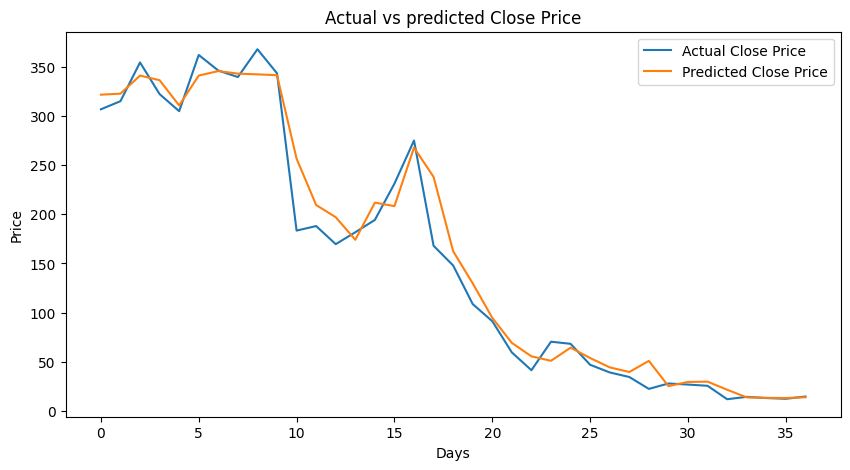

In [58]:
plt.figure(figsize = (10,5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.legend()
plt.title("Actual vs predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()